In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../shopee/data/shopee-product-matching/train.csv')
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [3]:
images = [image for image in df['image']]
size_img = []
for image in images:
    image_size=Image.open(f"../shopee/data/shopee-product-matching/train_images/{image}").size
    size_img.append(image_size)
size_img

[(1024, 1024),
 (1000, 1000),
 (640, 640),
 (640, 640),
 (756, 756),
 (640, 640),
 (640, 640),
 (640, 640),
 (300, 300),
 (700, 700),
 (700, 700),
 (1000, 1000),
 (1000, 1000),
 (449, 449),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (800, 800),
 (314, 314),
 (595, 595),
 (4500, 4501),
 (700, 700),
 (604, 604),
 (665, 665),
 (700, 700),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (700, 700),
 (700, 700),
 (640, 640),
 (640, 640),
 (800, 800),
 (640, 640),
 (640, 640),
 (640, 640),
 (1000, 1000),
 (1000, 1000),
 (720, 720),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (700, 700),
 (699, 699),
 (800, 800),
 (640, 640),
 (700, 700),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (800, 800),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (700, 700),
 (820, 820),
 (640, 640),
 (960, 960),
 (640, 640),
 (748, 748),
 (800, 800),
 (1024, 1024),
 (1000, 1000),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (800, 800),
 (669

In [4]:
df_squarred = []
for image in images:
    image_size=Image.open(f"../shopee/data/shopee-product-matching/train_images/{image}").size
    if image_size[0] == image_size[1]:
        df_squarred.append(image)
    else:
        print('not square')
df_squarred

not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square

['0000a68812bc7e98c42888dfb1c07da0.jpg',
 '00039780dfc94d01db8676fe789ecd05.jpg',
 '000a190fdd715a2a36faed16e2c65df7.jpg',
 '00117e4fc239b1b641ff08340b429633.jpg',
 '00136d1cf4edede0203f32f05f660588.jpg',
 '0013e7355ffc5ff8fb1ccad3e42d92fe.jpg',
 '00144a49c56599d45354a1c28104c039.jpg',
 '0014f61389cbaa687a58e38a97b6383d.jpg',
 '0019a3c6755a194cb2e2c12bfc63972e.jpg',
 '001be52b2beec40ddc1d2d7fc7a68f08.jpg',
 '001d7f5d9a2fac714f4d5f37b3baffb4.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001f4c8331d0554d133b10d85b7fafb2.jpg',
 '001f5580b058c6b8e33132190a757318.jpg',
 '002039aaf8618627a0442d5e89e5dda6.jpg',
 '0027aaf8dd8bdbf0e4f2c19024e436cf.jpg',
 '00286d2760e433a8a01cbd9e056144f7.jpg',
 '002f978c58a44a00aadfca71c3cad2bb.jpg',
 '00303ad1c062fdeaf5f41b9ffb71a5fb.jpg',
 '003524b70715bf6bfa00451ca08e66e0.jpg',
 '0035b8fc42955c0fa2301b68e2ffe861.jpg',
 '00369839c7d94411e54437b7cf59b603.jpg',
 '003906c6c6bba4cde15e5e854dba8f6d.jpg',
 '003a6fbbdf88f0

In [5]:
pd.DataFrame(df_squarred)

,0
0,0000a68812bc7e98c42888dfb1c07da0.jpg
1,00039780dfc94d01db8676fe789ecd05.jpg
2,000a190fdd715a2a36faed16e2c65df7.jpg
3,00117e4fc239b1b641ff08340b429633.jpg
4,00136d1cf4edede0203f32f05f660588.jpg
...,...
34127,fff1c07ceefc2c970a7964cfb81981c5.jpg
34128,fff401691371bdcb382a0d9075dfea6a.jpg
34129,fff421b78fa7284284724baf249f522e.jpg
34130,fff51b87916dbfb6d0f8faa01bee67b8.jpg


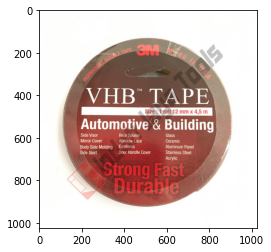

In [6]:
image = img.imread(f'../shopee/data/shopee-product-matching/train_images/8cbe4bf9706bc177fd61071ef776be8c.jpg')
plt.imshow(image)

In [7]:
image_open=img.imread(f"../shopee/data/shopee-product-matching/train_images/8cbe4bf9706bc177fd61071ef776be8c.jpg")
image_open

array([[[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
img_squarred = []
for image in df_squarred:
    image_open=Image.open(f"../shopee/data/shopee-product-matching/train_images/{image}").resize((256,256))
    img_squarred.append(image_open)
img_squarred

[<PIL.Image.Image image mode=RGB size=256x256 at 0x110488CD0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x11040ACA0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x11040A970>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x1211A0D00>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x12FB76F10>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x12FB76C40>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x12FB76CD0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x12FB76C10>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x1320992E0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x132099370>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x132099460>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x132099430>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x132099490>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x1320994C0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x132099520>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x1320

data_projected = pca.fit_transform(faces.data)

In [12]:
img_squarred[0].__dict__

{'im': <ImagingCore at 0x13206e770>,
 'mode': 'RGB',
 '_size': (256, 256),
 'palette': None,
 'info': {'jfif': 257,
  'jfif_version': (1, 1),
  'jfif_unit': 0,
  'jfif_density': (1, 1)},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None}

In [20]:
img_squarred[0].show()

In [9]:
pca = PCA(n_components=100)

In [22]:
data_projected = pca.fit_transform()

TypeError: float() argument must be a string or a number, not 'Image'

In [ ]:
data_reconstructed = pca.inverse_transform(data_projected)